In [1]:
from neurovelo.train import Trainer
from neurovelo.utils import ModelAnalyzer,latent_data,evaluate,decode_gene_velocity,vector_fields_similarity
import scvelo as scv
import scanpy as sc
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [90]:
adata = scv.datasets.gastrulation_erythroid()

Do all preprocessing before running the method.

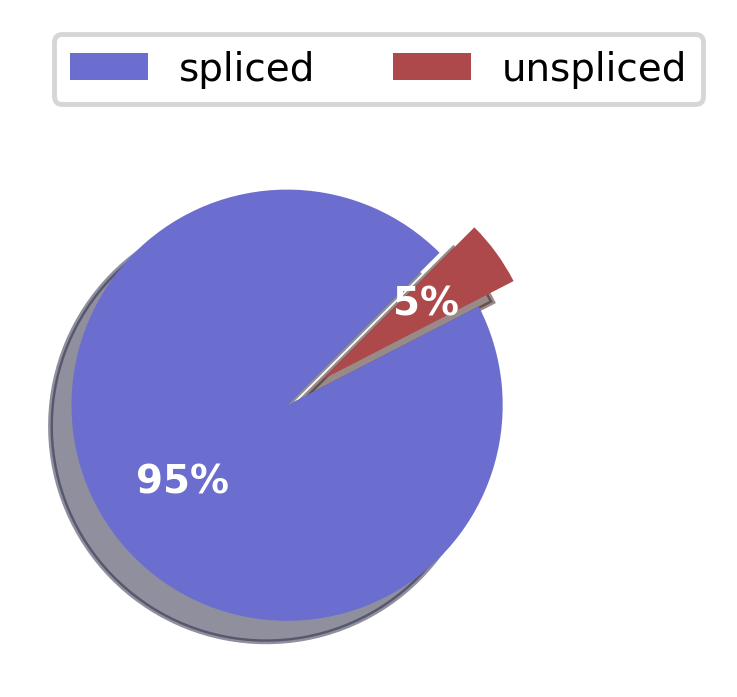

Filtered out 47456 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


In [91]:
scv.pl.proportions(adata, dpi=350)
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)


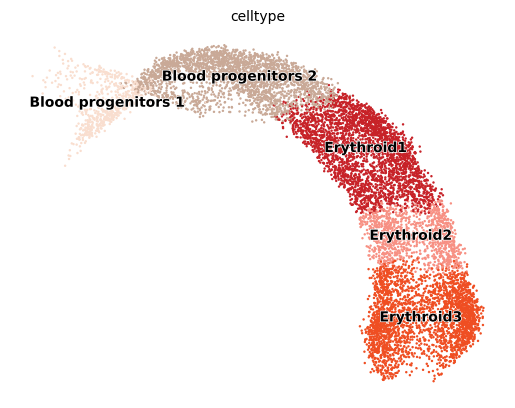

In [92]:
scv.pl.umap(adata, color='celltype')

In [93]:
sc.pp.log1p(adata, layer='spliced')
sc.pp.log1p(adata, layer='unspliced')

**NeuroVelo takes "sample" obs to learn sample specific dynamics. If you want to train for global dynamics of your dataset. Create a sample obs and set it to zero as shown here**

In [94]:
adata.obs['sample'] = 0

***You can pass in layer argument whether you want to use moments (pass 'Ms') or reads (pass 'spliced').
You can also pass all the usual argument to train a neural network.***

In [95]:
model = Trainer(adata,layer='spliced', odesample_obs = 'sample', n_sample=1, percent=0.8, nepoch=160
                ,reconstruct_xt=True, batch_size=100, n_latent=50, n_ode_hidden=100, n_vae_hidden=100)

Using spliced and unspliced reads


In [96]:
model.train()



  0%|                                                                                        | 0/300 [00:00<?, ?epoch/s]

Epoch 1:   0%|                                                                               | 0/300 [00:14<?, ?epoch/s]

Epoch 1:   0%|                                     | 1/300 [00:14<1:12:36, 14.57s/epoch, train_loss=2.02, val_loss=1.88]

Epoch 2:   0%|                                     | 1/300 [00:25<1:12:36, 14.57s/epoch, train_loss=2.02, val_loss=1.88]

Epoch 2:   1%|▏                                   | 2/300 [00:25<1:02:15, 12.53s/epoch, train_loss=1.46, val_loss=0.791]

Epoch 3:   1%|▏                                   | 2/300 [00:41<1:02:15, 12.53s/epoch, train_loss=1.46, val_loss=0.791]

Epoch 3:   1%|▎                                  | 3/300 [00:41<1:08:39, 13.87s/epoch, train_loss=0.535, val_loss=0.455]

Epoch 4:   1%|▎                                  | 3/300 [00:56<1:08:39, 13.87s/epoch, train_loss=0.535, val_loss=0.455]

Epoch 4:   1%|▍       

Epoch 32:  11%|███▌                             | 32/300 [08:04<1:14:50, 16.76s/epoch, train_loss=0.399, val_loss=0.398]

Epoch 33:  11%|███▌                             | 32/300 [08:20<1:14:50, 16.76s/epoch, train_loss=0.399, val_loss=0.398]

Epoch 33:  11%|███▋                             | 33/300 [08:20<1:13:47, 16.58s/epoch, train_loss=0.398, val_loss=0.398]

Epoch 34:  11%|███▋                             | 33/300 [08:38<1:13:47, 16.58s/epoch, train_loss=0.398, val_loss=0.398]

Epoch 34:  11%|███▋                             | 34/300 [08:38<1:15:21, 17.00s/epoch, train_loss=0.398, val_loss=0.397]

Epoch 35:  11%|███▋                             | 34/300 [08:51<1:15:21, 17.00s/epoch, train_loss=0.398, val_loss=0.397]

Epoch 35:  12%|███▊                             | 35/300 [08:51<1:10:17, 15.91s/epoch, train_loss=0.398, val_loss=0.397]

Epoch 36:  12%|███▊                             | 35/300 [09:09<1:10:17, 15.91s/epoch, train_loss=0.398, val_loss=0.397]

Epoch 36:  12%|███▉     

Epoch 96:  32%|███████████▏                       | 96/300 [24:59<54:48, 16.12s/epoch, train_loss=0.364, val_loss=0.362]

Epoch 97:  32%|███████████▏                       | 96/300 [25:13<54:48, 16.12s/epoch, train_loss=0.364, val_loss=0.362]

Epoch 97:  32%|███████████▎                       | 97/300 [25:13<52:30, 15.52s/epoch, train_loss=0.361, val_loss=0.362]

Epoch 98:  32%|███████████▎                       | 97/300 [25:31<52:30, 15.52s/epoch, train_loss=0.361, val_loss=0.362]

Epoch 98:  33%|███████████▍                       | 98/300 [25:31<55:02, 16.35s/epoch, train_loss=0.359, val_loss=0.358]

Epoch 99:  33%|███████████▍                       | 98/300 [25:46<55:02, 16.35s/epoch, train_loss=0.359, val_loss=0.358]

Epoch 99:  33%|███████████▌                       | 99/300 [25:46<53:24, 15.94s/epoch, train_loss=0.357, val_loss=0.355]

Epoch 100:  33%|███████████▏                      | 99/300 [26:05<53:24, 15.94s/epoch, train_loss=0.357, val_loss=0.355]

Epoch 100:  33%|████████

Epoch 160:  53%|█████████████████▌               | 160/300 [42:43<43:09, 18.49s/epoch, train_loss=0.336, val_loss=0.336]

Epoch 161:  53%|█████████████████▌               | 160/300 [42:58<43:09, 18.49s/epoch, train_loss=0.336, val_loss=0.336]

Epoch 161:  54%|█████████████████▋               | 161/300 [42:58<40:34, 17.51s/epoch, train_loss=0.336, val_loss=0.336]

Epoch 162:  54%|█████████████████▋               | 161/300 [43:17<40:34, 17.51s/epoch, train_loss=0.336, val_loss=0.336]

Epoch 162:  54%|█████████████████▊               | 162/300 [43:17<40:57, 17.80s/epoch, train_loss=0.336, val_loss=0.336]

Epoch 163:  54%|█████████████████▊               | 162/300 [43:34<40:57, 17.80s/epoch, train_loss=0.336, val_loss=0.336]

Epoch 163:  54%|█████████████████▉               | 163/300 [43:34<40:08, 17.58s/epoch, train_loss=0.336, val_loss=0.336]

Epoch 164:  54%|█████████████████▉               | 163/300 [43:53<40:08, 17.58s/epoch, train_loss=0.336, val_loss=0.336]

Epoch 164:  55%|████████

Epoch 224:  75%|███████████████████████▏       | 224/300 [1:01:31<21:38, 17.08s/epoch, train_loss=0.336, val_loss=0.335]

Epoch 225:  75%|███████████████████████▏       | 224/300 [1:01:46<21:38, 17.08s/epoch, train_loss=0.336, val_loss=0.335]

Epoch 225:  75%|███████████████████████▎       | 225/300 [1:01:46<20:43, 16.58s/epoch, train_loss=0.336, val_loss=0.335]

Epoch 226:  75%|███████████████████████▎       | 225/300 [1:02:04<20:43, 16.58s/epoch, train_loss=0.336, val_loss=0.335]

Epoch 226:  75%|███████████████████████▎       | 226/300 [1:02:04<20:49, 16.89s/epoch, train_loss=0.336, val_loss=0.335]

Epoch 227:  75%|███████████████████████▎       | 226/300 [1:02:18<20:49, 16.89s/epoch, train_loss=0.336, val_loss=0.335]

Epoch 227:  76%|███████████████████████▍       | 227/300 [1:02:18<19:46, 16.26s/epoch, train_loss=0.336, val_loss=0.335]

Epoch 228:  76%|███████████████████████▍       | 227/300 [1:02:39<19:46, 16.26s/epoch, train_loss=0.336, val_loss=0.335]

Epoch 228:  76%|████████

Epoch 288:  96%|█████████████████████████████▊ | 288/300 [1:20:19<03:41, 18.48s/epoch, train_loss=0.335, val_loss=0.335]

Epoch 289:  96%|█████████████████████████████▊ | 288/300 [1:20:35<03:41, 18.48s/epoch, train_loss=0.335, val_loss=0.335]

Epoch 289:  96%|█████████████████████████████▊ | 289/300 [1:20:35<03:15, 17.81s/epoch, train_loss=0.335, val_loss=0.335]

Epoch 290:  96%|█████████████████████████████▊ | 289/300 [1:20:54<03:15, 17.81s/epoch, train_loss=0.335, val_loss=0.335]

Epoch 290:  97%|█████████████████████████████▉ | 290/300 [1:20:54<03:02, 18.22s/epoch, train_loss=0.335, val_loss=0.335]

Epoch 291:  97%|█████████████████████████████▉ | 290/300 [1:21:13<03:02, 18.22s/epoch, train_loss=0.335, val_loss=0.335]

Epoch 291:  97%|██████████████████████████████ | 291/300 [1:21:13<02:44, 18.29s/epoch, train_loss=0.335, val_loss=0.335]

Epoch 292:  97%|██████████████████████████████ | 291/300 [1:21:30<02:44, 18.29s/epoch, train_loss=0.335, val_loss=0.335]

Epoch 292:  97%|████████

In [97]:
model.save_model('./trained_models/','mouse_ery_trained_model_spliced')

In [98]:
latent_adata = latent_data(adata,'./trained_models/mouse_ery_trained_model_spliced.pth', layer='spliced')

In [99]:
scv.pp.neighbors(latent_adata, n_neighbors=30)
latent_adata.obsm['X_umap'] = adata.obsm['X_umap']

computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


In [100]:
reverse = False
if reverse:
    latent_adata.layers['spliced_velocity'] = -latent_adata.layers['spliced_velocity']

# Velocity in latent and gene space

Since our embedding in a linear embedding, the latent and gene space velocity should be similar, if you notice that they are different, try different set of parameters as this suggest that the decoder did not find an optimal reconsutrction.
### Velocity in Latent space

computing velocity graph (using 1/112 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:07) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)


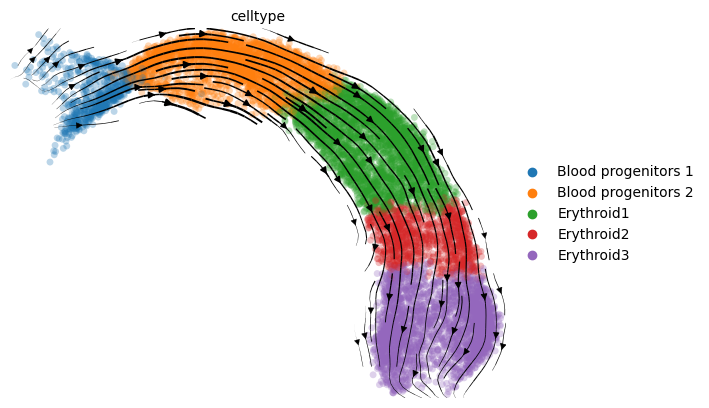

In [101]:
scv.tl.velocity_graph(latent_adata, vkey='spliced_velocity', xkey='spliced')
scv.tl.velocity_embedding(latent_adata, vkey='spliced_velocity', basis='umap')
scv.pl.velocity_embedding_stream(latent_adata,basis='umap',vkey='spliced_velocity', color='celltype',legend_loc='far right')

### Velocity in gene space

In [102]:
adata.layers['spliced_velocity'] = decode_gene_velocity(adata,'./trained_models/mouse_ery_trained_model_spliced.pth', layer='spliced')
if reverse:
    adata.layers['spliced_velocity'] = -adata.layers['spliced_velocity']

computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/112 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:01:09) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:03) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)


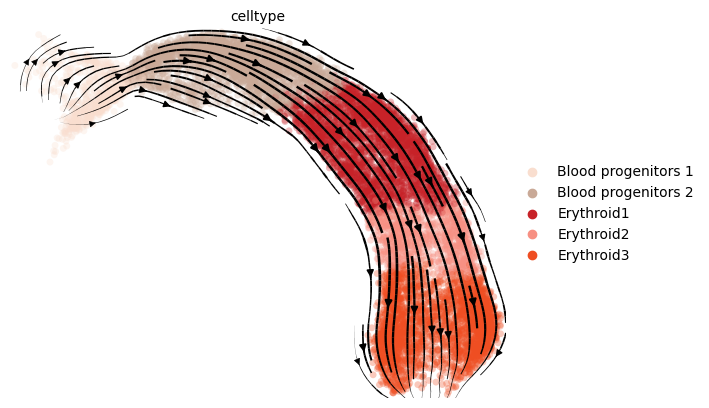

In [103]:
scv.pp.neighbors(adata)
scv.tl.velocity_graph(adata, vkey='spliced_velocity', xkey='spliced')
scv.tl.velocity_embedding(adata, vkey='spliced_velocity', basis='umap')
scv.pl.velocity_embedding_stream(adata,basis='umap',vkey='spliced_velocity', color='celltype',legend_loc='far right')

The evaluate function is the same of UniTVelo, it measures Cross boundary direction and In-Cluster coherence. The cluster edges should contain the direction from A->B ("A", "B"), we evaluate it for both velocity in latent space (latent_adata) and velocity in gene space (adata)

In [104]:
cluster_edges = [
    ("Blood progenitors 1", "Blood progenitors 2"), 
    ("Blood progenitors 2", "Erythroid1"),
    ("Erythroid1", "Erythroid2"), 
    ("Erythroid2", "Erythroid3")]

In [105]:
evaluate(latent_adata, cluster_edges, 'celltype','spliced_velocity')

# Cross-Boundary Direction Correctness (A->B)
{('Blood progenitors 1', 'Blood progenitors 2'): 0.6914836482403715, ('Blood progenitors 2', 'Erythroid1'): 0.5662684344588971, ('Erythroid1', 'Erythroid2'): 0.5827509969028917, ('Erythroid2', 'Erythroid3'): 0.5452911448351423}
Total Mean: 0.5964485561093256
# In-cluster Coherence
{'Blood progenitors 1': 0.9999948870567965, 'Blood progenitors 2': 0.9999940794839729, 'Erythroid1': 0.9999932082921558, 'Erythroid2': 0.9999909353381051, 'Erythroid3': 0.9999734741871429}
Total Mean: 0.9999893168716346


{'Cross-Boundary Direction Correctness (A->B)': ({('Blood progenitors 1',
    'Blood progenitors 2'): 0.6914836482403715,
   ('Blood progenitors 2', 'Erythroid1'): 0.5662684344588971,
   ('Erythroid1', 'Erythroid2'): 0.5827509969028917,
   ('Erythroid2', 'Erythroid3'): 0.5452911448351423},
  0.5964485561093256),
 'In-cluster Coherence': ({'Blood progenitors 1': 0.9999948870567965,
   'Blood progenitors 2': 0.9999940794839729,
   'Erythroid1': 0.9999932082921558,
   'Erythroid2': 0.9999909353381051,
   'Erythroid3': 0.9999734741871429},
  0.9999893168716346)}

In [106]:
evaluate(adata, cluster_edges, 'celltype','spliced_velocity')

# Cross-Boundary Direction Correctness (A->B)
{('Blood progenitors 1', 'Blood progenitors 2'): 0.8760163015453595, ('Blood progenitors 2', 'Erythroid1'): 0.7898011582553268, ('Erythroid1', 'Erythroid2'): 0.8367314563390459, ('Erythroid2', 'Erythroid3'): 0.8284105810206362}
Total Mean: 0.8327398742900921
# In-cluster Coherence
{'Blood progenitors 1': 0.99997306, 'Blood progenitors 2': 0.99996567, 'Erythroid1': 0.99992365, 'Erythroid2': 0.999851, 'Erythroid3': 0.99945897}
Total Mean: 0.999834418296814


{'Cross-Boundary Direction Correctness (A->B)': ({('Blood progenitors 1',
    'Blood progenitors 2'): 0.8760163015453595,
   ('Blood progenitors 2', 'Erythroid1'): 0.7898011582553268,
   ('Erythroid1', 'Erythroid2'): 0.8367314563390459,
   ('Erythroid2', 'Erythroid3'): 0.8284105810206362},
  0.8327398742900921),
 'In-cluster Coherence': ({'Blood progenitors 1': 0.99997306,
   'Blood progenitors 2': 0.99996567,
   'Erythroid1': 0.99992365,
   'Erythroid2': 0.999851,
   'Erythroid3': 0.99945897},
  0.9998344)}

# Trained models evaluation

We do the same preprocessing done during training

Abundance of ['unspliced', 'spliced']: [0.05 0.95]


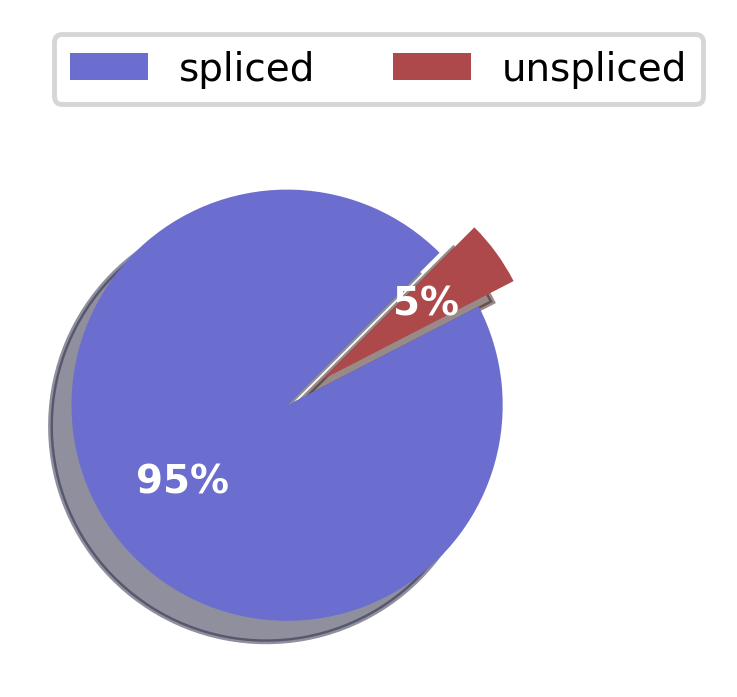

Filtered out 47456 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors


2024-06-13 11:13:47.362386: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-13 11:13:47.401916: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-13 11:13:50.561523: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


    finished (0:00:46) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [3]:
adata = scv.datasets.gastrulation_erythroid()
scv.pp.remove_duplicate_cells(adata)
scv.utils.show_proportions(adata)
scv.pl.proportions(adata, dpi=350)
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
sc.pp.log1p(adata, layer='spliced')
sc.pp.log1p(adata, layer='unspliced')
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
adata.obs['sample'] = 0 #the obs sample is to tell the model that we fit all the data in one neural ODE

In [4]:
zspliced_models = glob.glob('./trained_models/mouse_erythroid_zt/*layer_spliced*')
zmoments_models = glob.glob('./trained_models/mouse_erythroid_zt/*layer_Ms*')
xspliced_models = glob.glob('./trained_models/mouse_erythroid_xt/*layer_spliced*')
xmoments_models = glob.glob('./trained_models/mouse_erythroid_xt/*layer_Ms*')

In [5]:
zmoments_cos_sim, zmoments_mean = vector_fields_similarity(adata, zmoments_models, layer="Ms")
zspliced_cos_sim, zspliced_mean = vector_fields_similarity(adata, zspliced_models, layer="spliced")
xmoments_cos_sim, xmoments_mean = vector_fields_similarity(adata, xmoments_models, layer="Ms")
xspliced_cos_sim, xspliced_mean = vector_fields_similarity(adata, xspliced_models, layer="spliced")

([<matplotlib.axis.XTick at 0x7f86451c9b20>,
 [Text(0, 0, 'z_moments'),
  Text(1, 0, 'z_normalized reads'),
  Text(2, 0, 'x_moments'),
  Text(3, 0, 'x_normalized reads')])

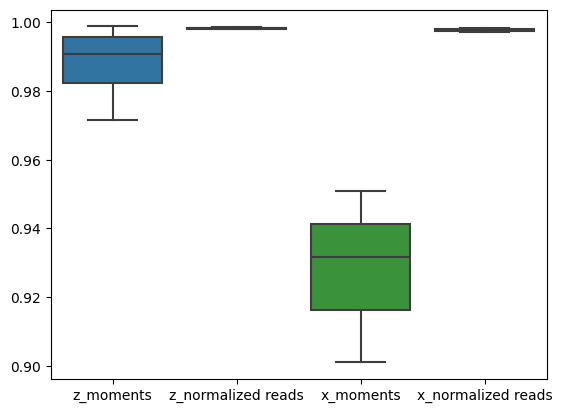

In [6]:
sns.boxplot([list(zmoments_cos_sim.values()), list(zspliced_cos_sim.values()),
             list(xmoments_cos_sim.values()), list(xspliced_cos_sim.values())])
plt.xticks([0,1,2,3],['z_moments','z_normalized reads','x_moments','x_normalized reads'])

### For the rest of analysis, we are taking the model trained using spliced reads instead of moments, and it doesn't make a difference whether we reconstruct reconstructs $z(t)$ or $x(t)$ as it shows the same level of rubstness

In [8]:
cluster_edges = [
    ("Blood progenitors 1", "Blood progenitors 2"), 
    ("Blood progenitors 2", "Erythroid1"),
    ("Erythroid1", "Erythroid2"), 
    ("Erythroid2", "Erythroid3")]

computing velocity graph (using 1/112 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:55) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)


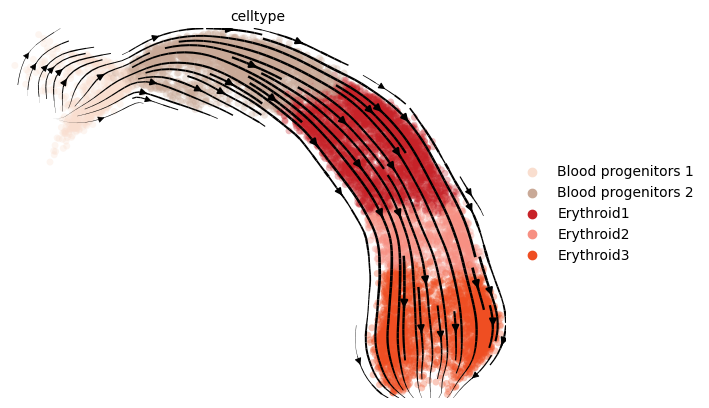

# Cross-Boundary Direction Correctness (A->B)
{('Blood progenitors 1', 'Blood progenitors 2'): 0.8186496799124235, ('Blood progenitors 2', 'Erythroid1'): 0.7927100445700103, ('Erythroid1', 'Erythroid2'): 0.8206147027105147, ('Erythroid2', 'Erythroid3'): 0.8304874136728583}
Total Mean: 0.8156154602164517
# In-cluster Coherence
{'Blood progenitors 1': 0.9999694, 'Blood progenitors 2': 0.9999718, 'Erythroid1': 0.9999369, 'Erythroid2': 0.99987274, 'Erythroid3': 0.9993569}
Total Mean: 0.9998215436935425
computing velocity graph (using 1/112 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:53) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)


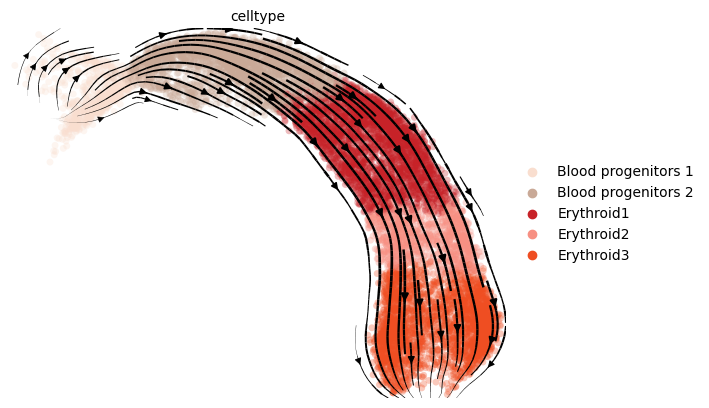

# Cross-Boundary Direction Correctness (A->B)
{('Blood progenitors 1', 'Blood progenitors 2'): 0.818137454111898, ('Blood progenitors 2', 'Erythroid1'): 0.7929036473478499, ('Erythroid1', 'Erythroid2'): 0.8208783603244769, ('Erythroid2', 'Erythroid3'): 0.8307502985178035}
Total Mean: 0.8156674400755071
# In-cluster Coherence
{'Blood progenitors 1': 0.99998355, 'Blood progenitors 2': 0.999983, 'Erythroid1': 0.9999592, 'Erythroid2': 0.9999097, 'Erythroid3': 0.99950147}
Total Mean: 0.9998674392700195
computing velocity graph (using 1/112 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:50) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)


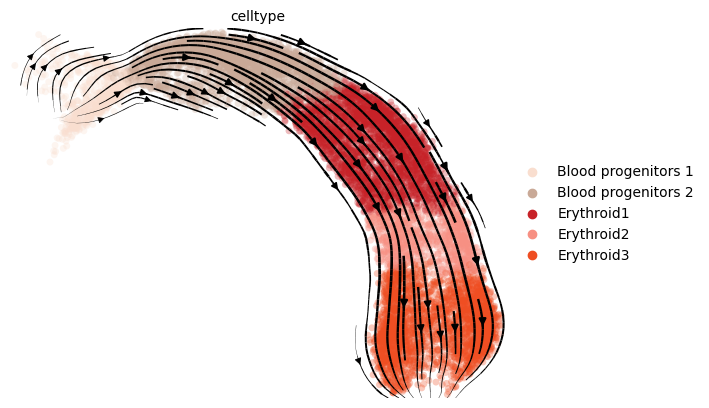

# Cross-Boundary Direction Correctness (A->B)
{('Blood progenitors 1', 'Blood progenitors 2'): 0.8216505577068111, ('Blood progenitors 2', 'Erythroid1'): 0.7930874444439756, ('Erythroid1', 'Erythroid2'): 0.8207989068808554, ('Erythroid2', 'Erythroid3'): 0.8304665881400694}
Total Mean: 0.8165008742929278
# In-cluster Coherence
{'Blood progenitors 1': 0.9999718, 'Blood progenitors 2': 0.9999732, 'Erythroid1': 0.99994147, 'Erythroid2': 0.9998872, 'Erythroid3': 0.999465}
Total Mean: 0.9998477697372437
computing velocity graph (using 1/112 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:49) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)


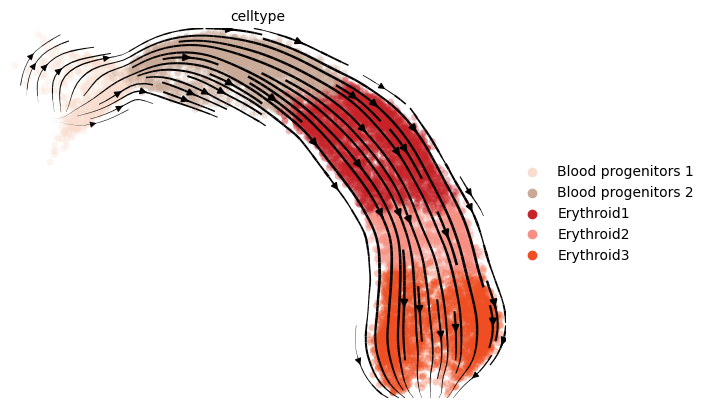

# Cross-Boundary Direction Correctness (A->B)
{('Blood progenitors 1', 'Blood progenitors 2'): 0.8228561648761011, ('Blood progenitors 2', 'Erythroid1'): 0.793115436590798, ('Erythroid1', 'Erythroid2'): 0.8208602959782216, ('Erythroid2', 'Erythroid3'): 0.830667543055884}
Total Mean: 0.8168748601252511
# In-cluster Coherence
{'Blood progenitors 1': 0.9999714, 'Blood progenitors 2': 0.9999703, 'Erythroid1': 0.99993145, 'Erythroid2': 0.999859, 'Erythroid3': 0.9993113}
Total Mean: 0.999808669090271
computing velocity graph (using 1/112 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:49) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)


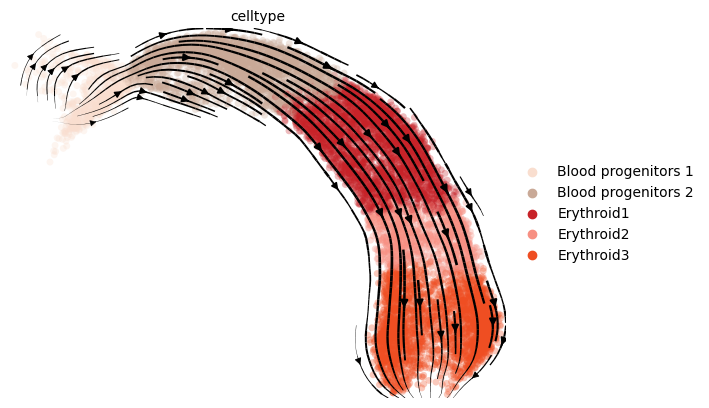

# Cross-Boundary Direction Correctness (A->B)
{('Blood progenitors 1', 'Blood progenitors 2'): 0.8245113805379866, ('Blood progenitors 2', 'Erythroid1'): 0.7930599204250869, ('Erythroid1', 'Erythroid2'): 0.8211093708011391, ('Erythroid2', 'Erythroid3'): 0.8308158068721574}
Total Mean: 0.8173741196590925
# In-cluster Coherence
{'Blood progenitors 1': 0.99996984, 'Blood progenitors 2': 0.9999696, 'Erythroid1': 0.99993014, 'Erythroid2': 0.9998634, 'Erythroid3': 0.99934053}
Total Mean: 0.9998146891593933
computing velocity graph (using 1/112 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:50) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)


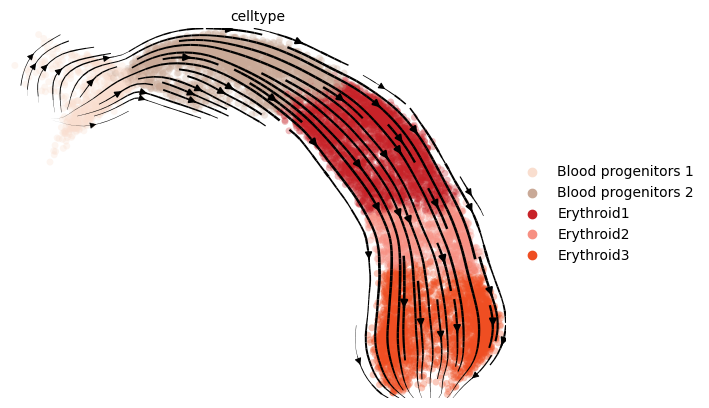

# Cross-Boundary Direction Correctness (A->B)
{('Blood progenitors 1', 'Blood progenitors 2'): 0.8215387845414954, ('Blood progenitors 2', 'Erythroid1'): 0.7928985397302719, ('Erythroid1', 'Erythroid2'): 0.8209461721166122, ('Erythroid2', 'Erythroid3'): 0.8307060583997167}
Total Mean: 0.8165223886970241
# In-cluster Coherence
{'Blood progenitors 1': 0.99996865, 'Blood progenitors 2': 0.99996936, 'Erythroid1': 0.99992466, 'Erythroid2': 0.9998392, 'Erythroid3': 0.9991051}
Total Mean: 0.9997614026069641


In [9]:
for mom in zspliced_models:
    adata.layers['spliced_velocity'] = decode_gene_velocity(adata,mom, layer='spliced')
    scv.tl.velocity_graph(adata, vkey='spliced_velocity', xkey='spliced')
    scv.tl.velocity_embedding(adata, vkey='spliced_velocity', basis='umap')
    scv.pl.velocity_embedding_stream(adata,basis='umap',vkey='spliced_velocity', color='celltype',legend_loc='far right')
    evaluate(adata, cluster_edges, 'celltype','spliced_velocity')

In [10]:
adata.obs['treatment'] = 'no_treatment'

In [11]:
analyzer = ModelAnalyzer(data=adata, n_vectors=25, layer='spliced', models_path=zspliced_models)
results = analyzer.models_output()
gene_ranking_order, gene_ranking_mean = analyzer.gene_ranking()

You can take this list of genes and pass it to https://string-db.org/, which is a database for protein interaction. You can also download the network coordinate and pass it through our ```graph_maker.plot_custom_graph``` method for the same visualization

In [12]:
#List of important genes for the dynamics
for g in gene_ranking_order['no_treatment'][0][:15].values:
    print(g)

Hba-x
Hbb-y
Hbb-bh1
Hba-a2
Malat1
Mrpl20
Mgst3
Hbb-bs
Txn2
Blvrb
Gypa
Alad
Pop5
Nol7
Tmem14c


In [13]:
from neurovelo.grn import GraphMaker

In [14]:
graph_maker = GraphMaker(adata, np.random.choice(xspliced_models), layer='spliced')

In [15]:
adata.obs['clusters'] = adata.obs['celltype']

In [16]:
genes_of_interest = gene_ranking_order['no_treatment'][0][:15].values  # List of genes you're interested in
n_frames = 1  # Number of frames for the analysis (in case you want animated network)
take_windows = False  # Whether to take windows  (in case you want animated network)
ci = 0  # Start index for cell of ptime
take_smallest_ptime = False  # Whether to take smallest ptime cells

# Call the graph_maker method
A, gi, g, mean_ptime, sorted_cell_value, cell_of_ptime = graph_maker.graph_maker(
    genes_of_interest,
)

In [17]:
# Step 3: Create the graph
threshold_a = 0.05  # Threshold for significant connections
G = graph_maker.create_graph(A, gi, g, threshold_a)

The following genes are either not protein coding genes or not found in string-db:  ['Malat1']


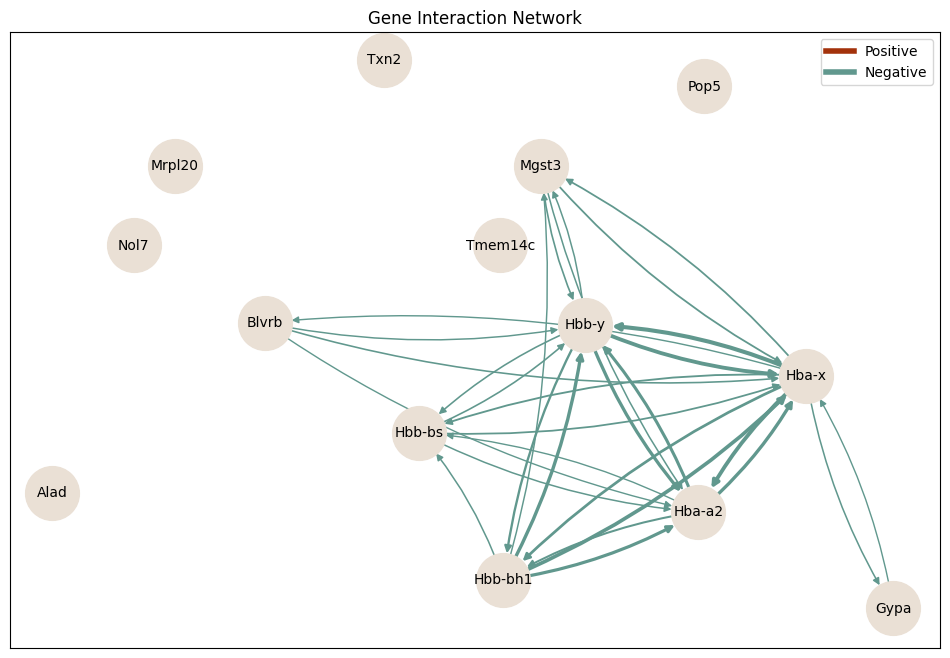

In [18]:
# Step 4: Plot the graph
graph_maker.plot_custom_graph(G,edge_width=20,network_node_file='network_coordinate/string_network_coordinates_mouse_ery.tsv')

## Network from stringdb

<img src="stringdb_network/string_normal_image_mouse_ery.png">